### Importación de datos



In [ ]:
import pandas as pd
url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)
pd.set_option("display.max_columns", None);

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [ ]:
ingreso_tienda1 = round(tienda['Precio'].sum());
ingreso_tienda2 = round(tienda2['Precio'].sum());
ingreso_tienda3 = round(tienda3['Precio'].sum());
ingreso_tienda4 = round(tienda4['Precio'].sum());

print(f"Ingreso total de tienda 1: ${format(ingreso_tienda1, ',')}")
print(f"Ingreso total de tienda 2: ${format(ingreso_tienda2, ',')}")
print(f"Ingreso total de tienda 3: ${format(ingreso_tienda3, ',')}")
print(f"Ingreso total de tienda 4: ${format(ingreso_tienda4, ',')}")


Ingreso total de tienda 1: $1,150,880,400
Ingreso total de tienda 2: $1,116,343,500
Ingreso total de tienda 3: $1,098,019,600
Ingreso total de tienda 4: $1,038,375,700


# 2. Ventas por categoría

In [ ]:
#agrupo categoria y sumatoria de cada categoria

ventas_categoria_tienda1 = {categoria: int(tienda[tienda['Categoría del Producto'] == categoria]['Precio'].sum())
                             for categoria in set(tienda['Categoría del Producto'])}

ventas_categoria_tienda2 = tienda2.groupby('Categoría del Producto')['Precio'].sum();
ventas_categoria_tienda3 = tienda3.groupby('Categoría del Producto')['Precio'].sum();
ventas_categoria_tienda4 = tienda4.groupby('Categoría del Producto')['Precio'].sum();

#transformacion de datos a enteros

ventas_categoria_tienda2= ventas_categoria_tienda2.astype(int);
ventas_categoria_tienda3= ventas_categoria_tienda3.astype(int);
ventas_categoria_tienda4= ventas_categoria_tienda4.astype(int);

#la categoria mas vendida de cada tienda

categoria_mas_vendida_tienda1 = max(ventas_categoria_tienda1, key=ventas_categoria_tienda1.get)
categoria_mas_vendida_tienda2 = ventas_categoria_tienda2.idxmax();
categoria_mas_vendida_tienda3 = ventas_categoria_tienda3.idxmax();
categoria_mas_vendida_tienda4 = ventas_categoria_tienda4.idxmax();

print(f"Ventas por categoría (Tienda 1):\n")
for categoria, ventas in ventas_categoria_tienda1.items():
    print(f"{categoria :<30}: ${ventas:,.0f}")

print("\nCategoría más vendida (Tienda 1): ", categoria_mas_vendida_tienda1)

print("\nVentas por categoría (Tienda 2):\n")
for categoria, ventas in ventas_categoria_tienda2.items():
    print(f"{categoria :<30}: ${ventas:,.0f}")

print("\nCategoría más vendida (Tienda 2): ", categoria_mas_vendida_tienda2)

print("\nVentas por categoría (Tienda 3):\n")
for categoria, ventas in ventas_categoria_tienda3.items():
    print(f"{categoria :<30}: ${ventas:,.0f}")
print("\nCategoría más vendida (Tienda 3): ", categoria_mas_vendida_tienda3)

print("\nVentas por categoría (Tienda 4):\n")
for categoria, ventas in ventas_categoria_tienda4.items():
    print(f"{categoria :<30}: ${ventas:,.0f}")
print("\nCategoría más vendida (Tienda 4): ", categoria_mas_vendida_tienda4)


Ventas por categoría (Tienda 1):

Artículos para el hogar       : $12,698,400
Juguetes                      : $17,995,700
Deportes y diversión          : $39,290,000
Instrumentos musicales        : $91,299,000
Electrodomésticos             : $363,685,200
Electrónicos                  : $429,493,500
Muebles                       : $187,633,700
Libros                        : $8,784,900

Categoría más vendida (Tienda 1):  Electrónicos

Ventas por categoría (Tienda 2):

Artículos para el hogar       : $14,746,900
Deportes y diversión          : $34,744,500
Electrodomésticos             : $348,567,800
Electrónicos                  : $410,831,100
Instrumentos musicales        : $104,990,300
Juguetes                      : $15,945,400
Libros                        : $10,091,200
Muebles                       : $176,426,300

Categoría más vendida (Tienda 2):  Electrónicos

Ventas por categoría (Tienda 3):

Artículos para el hogar       : $15,060,000
Deportes y diversión          : $35,593,100


# 3. Calificación promedio de la tienda


In [ ]:
calificacion_tienda1= tienda['Calificación'].sum()/tienda['Calificación'].count();
calificacion_tienda2= tienda2['Calificación'].sum()/tienda2['Calificación'].count();
calificacion_tienda3= tienda3['Calificación'].sum()/tienda3['Calificación'].count();
calificacion_tienda4= tienda4['Calificación'].sum()/tienda4['Calificación'].count();

print(f"Calificación promedio de la tienda 1: {calificacion_tienda1.round(2)}");
print(f"Calificación promedio de la tienda 2: {round(calificacion_tienda2,2)}");
print(f"Calificación promedio de la tienda 3: {round(calificacion_tienda3,2)}");
print(f"Calificación promedio de la tienda 4: {round(calificacion_tienda4,2)}");

Calificación promedio de la tienda 1: 3.98
Calificación promedio de la tienda 2: 4.04
Calificación promedio de la tienda 3: 4.05
Calificación promedio de la tienda 4: 4.0


# 4. Productos más y menos vendidos

In [ ]:
#filtrados productos

conteo_productos_tienda1 = tienda['Producto'].str.strip().value_counts().to_dict();
conteo_productos_tienda2 = tienda2['Producto'].str.strip().value_counts().to_dict();
conteo_productos_tienda3 = tienda3['Producto'].str.strip().value_counts().to_dict();
conteo_productos_tienda4 = tienda4['Producto'].str.strip().value_counts().to_dict();

#filtrando maximos y minimos de productos

max_ventas_tienda1 = max(conteo_productos_tienda1.values());
min_ventas_tienda1 = min(conteo_productos_tienda1.values());
max_ventas_tienda2 = max(conteo_productos_tienda2.values());
min_ventas_tienda2 = min(conteo_productos_tienda2.values());
max_ventas_tienda3 = max(conteo_productos_tienda3.values());
min_ventas_tienda3 = min(conteo_productos_tienda3.values());
max_ventas_tienda4 = max(conteo_productos_tienda4.values());
min_ventas_tienda4 = min(conteo_productos_tienda4.values());

#si hay mas de un maximo o minimo

mas_vendidos_tienda1 = [producto for producto, cantidad in conteo_productos_tienda1.items() if cantidad == max_ventas_tienda1];
menos_vendidos_tienda1 = [producto for producto, cantidad in conteo_productos_tienda1.items() if cantidad == min_ventas_tienda1];
mas_vendidos_tienda2 = [producto for producto, cantidad in conteo_productos_tienda2.items() if cantidad == max_ventas_tienda2];
menos_vendidos_tienda2 = [producto for producto, cantidad in conteo_productos_tienda2.items() if cantidad == min_ventas_tienda2];
mas_vendidos_tienda3 = [producto for producto, cantidad in conteo_productos_tienda3.items() if cantidad == max_ventas_tienda3];
menos_vendidos_tienda3 = [producto for producto, cantidad in conteo_productos_tienda3.items() if cantidad == min_ventas_tienda3];
mas_vendidos_tienda4 = [producto for producto, cantidad in conteo_productos_tienda4.items() if cantidad == max_ventas_tienda4];
menos_vendidos_tienda4 = [producto for producto, cantidad in conteo_productos_tienda4.items() if cantidad == min_ventas_tienda4];


In [ ]:

#tienda 1 resultados
print("productos mas vendidos de tienda 1:")
for producto in mas_vendidos_tienda1:
    print(f"{producto} : {max_ventas_tienda1} ventas")
print("\nproductos menos vendidos de tienda 1:")
for producto in menos_vendidos_tienda1:
    print(f"{producto} : {min_ventas_tienda1} ventas")
#tienda 2 resultados
print("\nproductos mas vendidos de tienda 2:")
for producto in mas_vendidos_tienda2:
    print(f"{producto} : {max_ventas_tienda2} ventas")
print("\nproductos menos vendidos de tienda 2:")
for producto in menos_vendidos_tienda2:
    print(f"{producto} : {min_ventas_tienda2} ventas")
#tienda 3 resultados
print("\nproductos mas vendidos de tienda 3:")
for producto in mas_vendidos_tienda3:
    print(f"{producto} : {max_ventas_tienda3} ventas")
    print("\nproductos menos vendidos de tienda 3:")
for producto in menos_vendidos_tienda3:
    print(f"{producto} : {min_ventas_tienda3} ventas")
#tienda 4 resultados
print("\nproductos mas vendidos de tienda 4:")
for producto in mas_vendidos_tienda4:
    print(f"{producto} : {max_ventas_tienda4} ventas")
print("\nproductos menos vendidos de tienda 4:")
for producto in menos_vendidos_tienda4:
    print(f"{producto} : {min_ventas_tienda4} ventas")

productos mas vendidos de tienda 1:
Microondas : 60 ventas
TV LED UHD 4K : 60 ventas
Armario : 60 ventas

productos menos vendidos de tienda 1:
Auriculares con micrófono : 33 ventas
Celular ABXY : 33 ventas

productos mas vendidos de tienda 2:
Iniciando en programación : 65 ventas

productos menos vendidos de tienda 2:
Juego de mesa : 32 ventas

productos mas vendidos de tienda 3:
Kit de bancas : 57 ventas

productos menos vendidos de tienda 3:
Bloques de construcción : 35 ventas

productos mas vendidos de tienda 4:
Cama box : 62 ventas

productos menos vendidos de tienda 4:
Guitarra eléctrica : 33 ventas


# 5. Envío promedio por tienda

In [ ]:
costo_envio_tienda1 = tienda['Costo de envío'].mean();
costo_envio_tienda2 = tienda2['Costo de envío'].mean();
costo_envio_tienda3 = tienda3['Costo de envío'].mean();
costo_envio_tienda4 = tienda4['Costo de envío'].mean();
print(f'el promedio de costo de envio de la tienda 1 es: ${format(round(costo_envio_tienda1),",")}')
print(f'el promedio de costo de envio de la tienda 2 es: ${format(round(costo_envio_tienda2),",")}')
print(f'el promedio de costo de envio de la tienda 3 es: ${format(round(costo_envio_tienda3),",")}')
print(f'el promedio de costo de envio de la tienda 4 es: ${format(round(costo_envio_tienda4),",")}')

el promedio de costo de envio de la tienda 1 es: $26,019
el promedio de costo de envio de la tienda 2 es: $25,216
el promedio de costo de envio de la tienda 3 es: $24,806
el promedio de costo de envio de la tienda 4 es: $23,459


# GENERANDO GRAFICOS

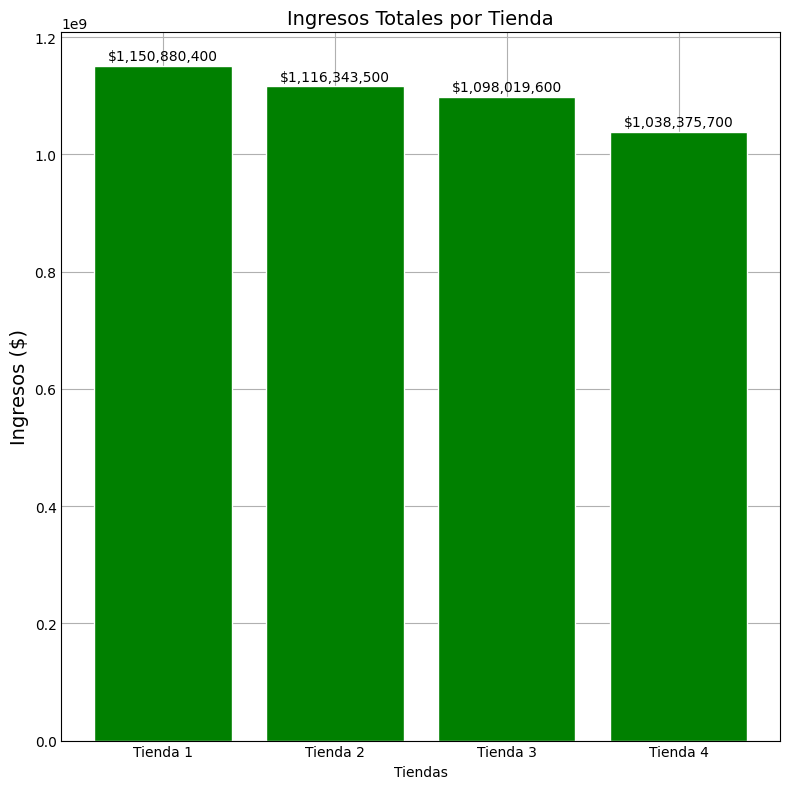

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
# Datos para el gráfico
tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']
ingresos = [ingreso_tienda1, ingreso_tienda2, ingreso_tienda3, ingreso_tienda4]

# Crear el gráfico de barras
plt.figure(figsize=(8, 8))
barras = plt.bar(tiendas, ingresos, color='green', edgecolor='white')

# Título y etiquetas
plt.title('Ingresos Totales por Tienda', fontsize=14)
plt.xlabel('Tiendas')
plt.ylabel('Ingresos ($)', fontsize=14)

# Etiquetas sobre las barras
for barra in barras:
    altura = barra.get_height()
    plt.annotate(f'${format(altura, ",")}',
                 xy=(barra.get_x() + barra.get_width() / 2, altura),
                 xytext=(0, 2),  # distancia hacia arriba
                 textcoords="offset points",
                 ha='center', va='bottom')

# Mostrar gráfico
plt.tight_layout()
plt.show()

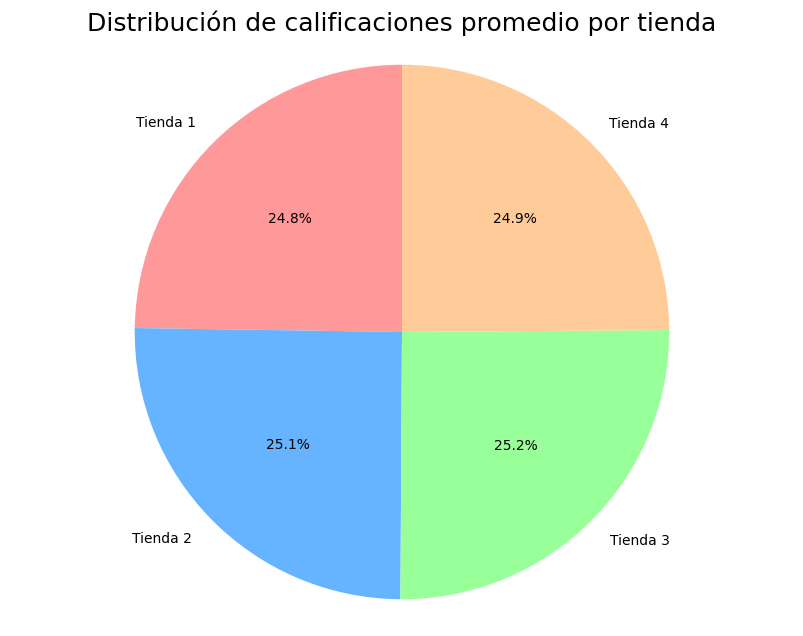

In [ ]:
# Etiquetas y valores para el gráfico
etiquetas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']
valores = [calificacion_tienda1, calificacion_tienda2, calificacion_tienda3, calificacion_tienda4]
colores = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
# Crear el gráfico de torta
plt.figure(figsize=(8, 6))
plt.pie(valores, labels=etiquetas, autopct='%1.1f%%', startangle=90, colors=colores)
plt.title('Distribución de calificaciones promedio por tienda', fontsize='18')
plt.axis('equal')  # Hace que el gráfico sea un círculo

plt.show()

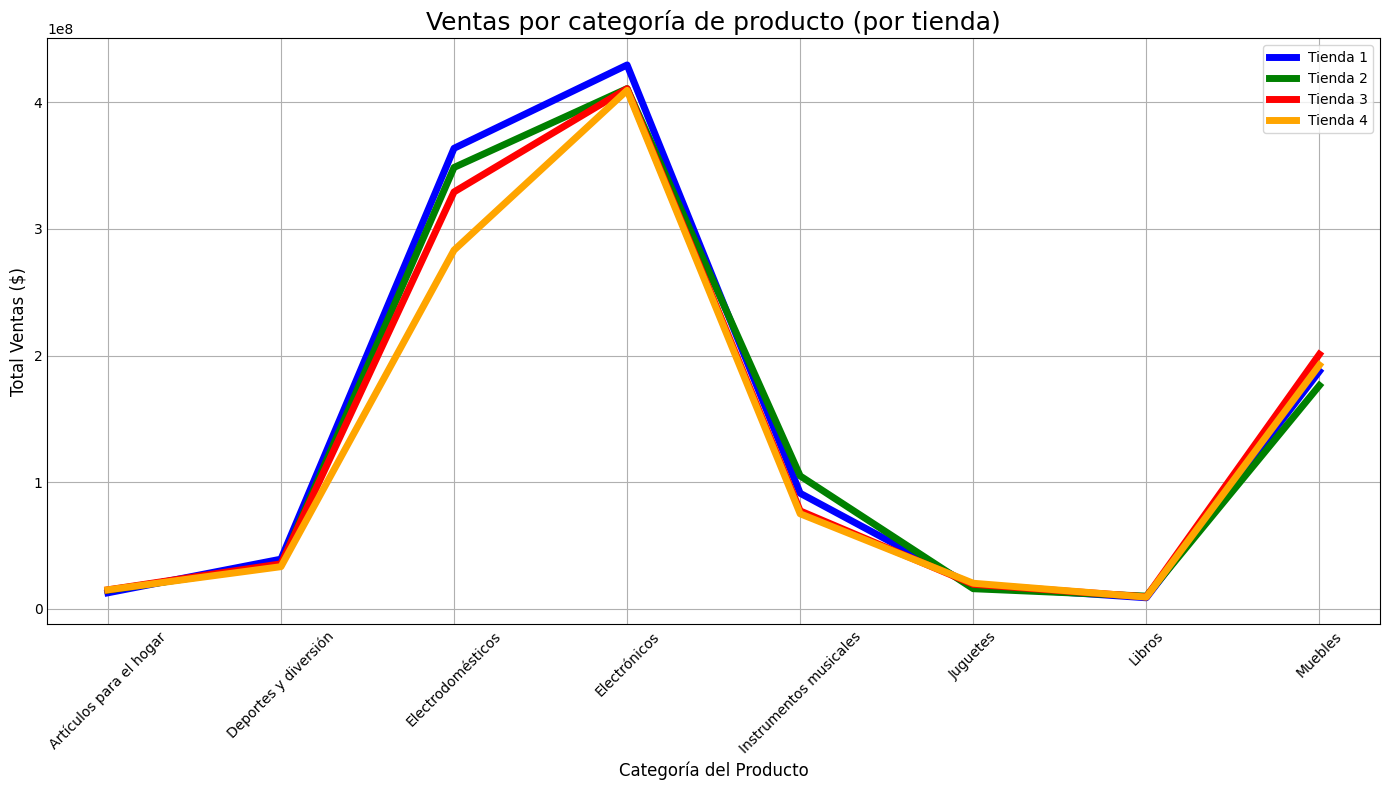

In [ ]:
categorias = sorted(set(tienda['Categoría del Producto']))

ventas1 = [ventas_categoria_tienda1.get(cat, 0) for cat in categorias]
ventas2 = [ventas_categoria_tienda2.get(cat, 0) for cat in categorias]
ventas3 = [ventas_categoria_tienda3.get(cat, 0) for cat in categorias]
ventas4 = [ventas_categoria_tienda4.get(cat, 0) for cat in categorias]

# Crear gráfico de líneas
plt.figure(figsize=(14, 8))

plt.plot(categorias, ventas1, label='Tienda 1', linewidth=5, color='blue')
plt.plot(categorias, ventas2, label='Tienda 2', linewidth=5, color='green')
plt.plot(categorias, ventas3, label='Tienda 3', linewidth=5, color='red')
plt.plot(categorias, ventas4, label='Tienda 4', linewidth=5, color='orange')

plt.title('Ventas por categoría de producto (por tienda)', fontsize=18)
plt.xlabel('Categoría del Producto', fontsize=12)
plt.ylabel('Total Ventas ($)', fontsize=12)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.grid(True)

plt.show()

## Informe Final – Análisis de Tiendas para el Sr. Juan

El presente análisis tiene como objetivo evaluar el desempeño de las tiendas disponibles, con el fin de asesorar al Sr. Juan sobre en cuál tienda debería enfocar sus ventas. Se han considerado múltiples factores como los ingresos generados, la distribución de categorías de productos, las calificaciones otorgadas por los clientes, los productos más y menos vendidos y los costos de envío. Con base en estos criterios, se busca determinar cuál tienda ofrece las mejores condiciones para maximizar ganancias y asegurar una buena experiencia para los clientes.

#1. Ingresos

Se analizaron los ingresos generados por cada tienda. Los resultados muestran que:

- tienda 1 obtuvo ingresos por:
      $1,150,880,400

- tienda 2 obtuvo ingresos por:
      $1,116,343,500

- tienda 3 obtuvo ingresos por:
      $1,098,019,600

- tienda 4 obtuvo ingresos por:
      $1,038,375,700

La tienda con mayores ingresos es la Tienda 1 se posiciona como líder en generación de ingresos, especialmente en categorías como Electrónicos.
---
#2. Categorías más y menos vendidas

Se identificaron las categorías de productos que más aportan al ingreso:

- Categoría más vendida:
      Electrónicos

- Categoría menos vendida:
      Libros

Esto indica una preferencia de los consumidores por productos tecnológicos, lo cual puede orientar la estrategia de inventario.
---
#3. Calificación promedio de clientes

La satisfacción del cliente fue medida con las calificaciones otorgadas:

- Tienda 1:
      Promedio de 3.98

- Tienda 2:
      Promedio de 4.04

- Tienda 3:

      Promedio de 4.05

- Tienda 4:
      Promedio de 4.0


Aunque todas las tiendas tienen buena reputación, la tienda 3 mantiene una ligera ventaja en satisfacción del cliente sobre el resto de tiendas.

---
#4. Productos más y menos vendidos

Del análisis de ventas por producto se determinó que:

A. Producto(s) más vendido:

- tienda 1:

      Microondas : 60 ventas
      TV LED UHD 4K : 60 ventas
      Armario : 60 ventas

- tienda 2:

      Iniciando en programación : 65 ventas

- tienda 3:

      Kit de bancas : 57 ventas

- tienda 4:

      Cama box : 62 ventas

B. Producto(s) menos vendido:

- tienda 1:

      Auriculares con micrófono : 33 ventas
      Celular ABXY : 33 ventas

- tienda 2:

      Juego de mesa : 32 ventas

- tienda 3:

      Bloques de construcción : 35 ventas

- tienda 4:

      Guitarra eléctrica : 33 ventas

Esto sugiere oportunidades para reforzar promociones en productos de baja rotación en las tiendas.

---
#5. Costo de envío promedio

Los costos de envío promedio fueron:

-Tienda 1:

      $26,019

-Tienda 2:

      $25,216
      
-Tienda 3:

      $24,806
      
-Tienda 4:

      $23,459

Una menor media de costos de envío puede significar mayor competitividad. La tienda con menor costo puede ser más atractiva para los consumidores finales.


---


#                  **Conclusión y Recomendación Final**

Con base en los análisis realizados, recomendamos que el Sr. Juan venda su Tienda 1, ya que:

Genera mayores ingresos totales.

Tiene el peor promedio de sastifaccion de clientes.

Mayores costos de envio.

Presenta una baja rotacion entre sus algunos de sus productos.

Se destaca en categoría con alta rotación y valor agregado (como electrónicos).

Aunque Tienda 1 lidera en ingresos, su baja calificación de clientes, el mayor costo de envío y la baja rotación en ciertos productos revelan ineficiencias operativas importantes. En consecuencia, Tienda 1 es la menos eficiente en términos de equilibrio entre ingresos, satisfacción del cliente y costos operativos. por lo tanto la tienda 1 es la recomendada para vender porque, a pesar de algunos puntos débiles (como el costo de envío más alto y la calificación ligeramente menor), es la más rentable, tiene mayor tráfico de ventas. Con estas caracteristicas le ofrecen al sr juan un mayor potencial de venta.


